<a href="https://colab.research.google.com/github/lukipuki0/GWO/blob/main/GWO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Función objetivo: función esférica
def funcion_objetivo(solucion):
    return np.sum(np.square(solucion))

# Inicializa una población aleatoria
def inicializarPoblacion(num_lobos, dimension, min_lim, max_lim):
    return np.random.uniform(min_lim, max_lim, (num_lobos, dimension))

# Evalúa la función objetivo para cada lobo en la población
def evaluarPoblacion(poblacion):
    fitness = []
    for lobo in poblacion:
        fitness.append(funcion_objetivo(lobo))  # Usamos la función esférica como función objetivo
    return np.array(fitness)


def GWO(maxIter, t, dimension, poblacion, fitness):
    a = 2 - t * ((2) / maxIter)  # Disminución de a linealmente de 2 a 0
    sortedIndices = np.argsort(fitness)  # Ordenar por fitness (mínimización)

    # Identificar a los lobos alfa, beta y delta
    X_alfa = poblacion[sortedIndices[0]]  # Lobo alfa
    X_beta = poblacion[sortedIndices[1]]  # Lobo beta
    X_delta = poblacion[sortedIndices[2]] # Lobo delta

    # Actualización de la posición de cada lobo
    for i in range(poblacion.shape[0]):
        for j in range(dimension):
            # Coeficientes aleatorios
            r1, r2 = random.uniform(0, 1), random.uniform(0, 1)
            A1 = 2 * a * r1 - a # ec 3.3
            C1 = 2 * r2 # ec 3.4
            D_alfa = abs(C1 * X_alfa[j] - poblacion[i][j]) # ec 3.5
            X1 = X_alfa[j] - A1 * D_alfa # ec 3.6

            r1, r2 = random.uniform(0, 1), random.uniform(0, 1)
            A2 = 2 * a * r1 - a # ec 3.3
            C2 = 2 * r2 # ec 3.4
            D_beta = abs(C2 * X_beta[j] - poblacion[i][j]) # ec 3.5
            X2 = X_beta[j] - A2 * D_beta # ec 3.6

            r1, r2 = random.uniform(0, 1), random.uniform(0, 1)
            A3 = 2 * a * r1 - a # ec 3.3
            C3 = 2 * r2 # ec 3.4
            D_delta = abs(C3 * X_delta[j] - poblacion[i][j]) # ec 3.5
            X3 = X_delta[j] - A3 * D_delta # ec 3.6

            # Actualización de la posición del lobo (promedio de alfa, beta, delta)
            poblacion[i][j] = (X1 + X2 + X3) / 3 # ec 3.7

    return np.array(poblacion)

In [ ]:
# Función principal para ejecutar GWO
def ejecutarGWO(num_lobos, dimension, maxIter, min_lim, max_lim):
    # Inicializa la población
    poblacion = inicializarPoblacion(num_lobos, dimension, min_lim, max_lim)
    fitness_generation = []

    # Iterar sobre las generaciones
    for t in range(maxIter):
        # Evaluar la población
        fitness = evaluarPoblacion(poblacion)

        # Aplicar una iteración del GWO
        poblacion = GWO(maxIter, t, dimension, poblacion, fitness)

        # Guardar el mejor fitness de la generación actual
        mejor_fitness = np.min(fitness)
        print(f"Iteración {t+1}, Mejor Fitness: {mejor_fitness}")
        fitness_generation.append(mejor_fitness)

    # Evaluar la población final
    fitness_final = evaluarPoblacion(poblacion)
    mejor_lobo = poblacion[np.argmin(fitness_final)]
    mejor_fitness = np.min(fitness_final)

    return mejor_lobo, mejor_fitness,fitness_generation

In [ ]:
def Graficar_convergencia(fitness_generaciones):
 # Crear el gráfico
  plt.figure(figsize=(10, 6))
  plt.plot(fitness_generaciones, marker='o', linestyle='-')
  plt.title('Convergencia del Fitness a lo largo de las generaciones')
  plt.xlabel('Generaciones')
  plt.ylabel('Fitness')
  plt.ylim(bottom=0)
  plt.grid(True)
  plt.show()

Iteración 1, Mejor Fitness: 59244.73389428
Iteración 2, Mejor Fitness: 54830.90288297508
Iteración 3, Mejor Fitness: 83767.4277409359
Iteración 4, Mejor Fitness: 55164.409927677356
Iteración 5, Mejor Fitness: 30029.930934021282
Iteración 6, Mejor Fitness: 23753.740939809093
Iteración 7, Mejor Fitness: 21428.90260875659
Iteración 8, Mejor Fitness: 14175.005960325225
Iteración 9, Mejor Fitness: 14114.803223495514
Iteración 10, Mejor Fitness: 11484.588213678187
Iteración 11, Mejor Fitness: 10059.300873668377
Iteración 12, Mejor Fitness: 8951.743056890165
Iteración 13, Mejor Fitness: 9096.355126943505
Iteración 14, Mejor Fitness: 5760.1999877797925
Iteración 15, Mejor Fitness: 5667.912689109766
Iteración 16, Mejor Fitness: 5345.674729739319
Iteración 17, Mejor Fitness: 4690.126337389472
Iteración 18, Mejor Fitness: 4824.520002276775
Iteración 19, Mejor Fitness: 3387.1920671077
Iteración 20, Mejor Fitness: 3778.806862975247
Iteración 21, Mejor Fitness: 3616.0938132981246
Iteración 22, Mejor

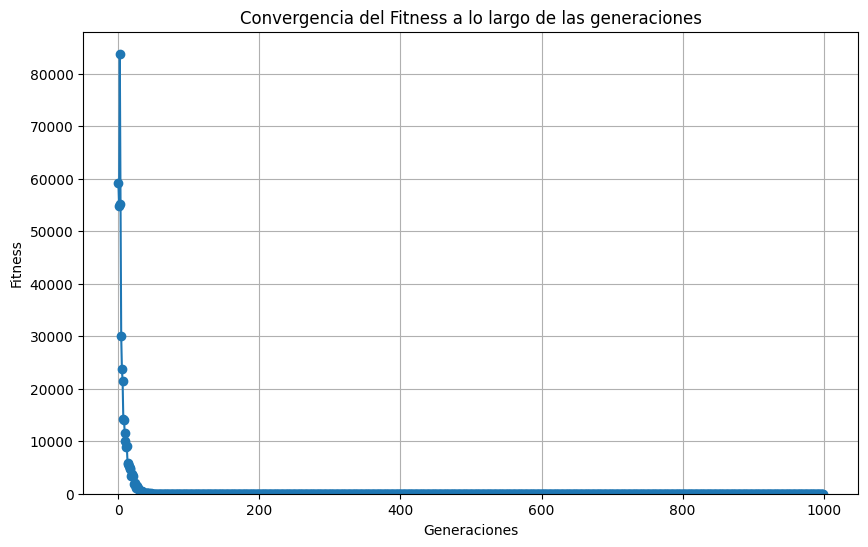

In [ ]:
# Parámetros de la ejecución
num_lobos = 30      # Tamaño de la población (lobos)
dimension = 30      # Dimensión del problema
maxIter = 1000       # Número de iteraciones
min_lim, max_lim = -100, 100  # Límites del espacio de búsqueda

# Ejecutar GWO
mejor_lobo, mejor_fitness,fitness_generation = ejecutarGWO(num_lobos, dimension, maxIter, min_lim, max_lim)
print(f"Mejor lobo encontrado: {mejor_lobo}")
print(f"Mejor fitness encontrado: {mejor_fitness}")
Graficar_convergencia(fitness_generation)